In [17]:
!git clone https://huggingface.co/datasets/BoKelvin/SLAKE

Cloning into 'SLAKE'...
Filtering content: 100% (2/2)
Filtering content: 100% (2/2), 202.58 MiB | 21.08 MiB/s, done.


### MedCLIP+ViT Inference

In [1]:

from PIL import Image

import torch
from medclip import MedCLIPModel, MedCLIPVisionModelViT
from medclip import MedCLIPProcessor
from medclip import PromptClassifier
import os
from medclip import constants

from medclip import MedCLIPModel, MedCLIPVisionModelViT
from medclip import MedCLIPProcessor, PromptClassifier
from PIL import Image
import torch
import torch
from medclip import MedCLIPModel, MedCLIPVisionModelViT, MedCLIPProcessor, PromptClassifier
from medclip.prompts import generate_chexpert_class_prompts, process_class_prompts
from PIL import Image

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model and processor
processor = MedCLIPProcessor()
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)

# Load weights from Hugging Face (no map_location allowed here)
model.from_pretrained("ucl-med/medclip-vit-base-patch16")

# Move model to device
model = model.to(device)

# Wrap classifier
clf = PromptClassifier(model, ensemble=True).to(device)

# Load image
image = Image.open(r'C:\Users\Rameshwar\MedCoTVQARad\MedCLIP\example_data\view1_frontal.jpg')

inputs = processor(images=image, return_tensors="pt")
inputs = {k: v.to(device) if torch.is_tensor(v) else v for k, v in inputs.items()}

# Generate prompts
cls_prompts = process_class_prompts(generate_chexpert_class_prompts(n=10))
inputs['prompt_inputs'] = cls_prompts

# Run inference
output = clf(**inputs)
print("Output is" )
print(output)


C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Some weights of the model checkpoint at micro

load model weight from: ucl-med/medclip-vit-base-patch16
sample 10 num of prompts for Atelectasis from total 210
sample 10 num of prompts for Cardiomegaly from total 15
sample 10 num of prompts for Consolidation from total 192
sample 10 num of prompts for Edema from total 18
sample 10 num of prompts for Pleural Effusion from total 54
Output is
{'logits': tensor([[0.3577, 0.4752, 0.1572, 0.2396, 0.3855]], device='cuda:0',
       grad_fn=<StackBackward0>), 'class_names': ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']}


In [2]:
from datasets import load_dataset

ds = load_dataset("BoKelvin/SLAKE")

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['img_name', 'location', 'answer', 'modality', 'base_type', 'answer_type', 'question', 'qid', 'content_type', 'triple', 'img_id', 'q_lang'],
        num_rows: 9835
    })
    validation: Dataset({
        features: ['img_name', 'location', 'answer', 'modality', 'base_type', 'answer_type', 'question', 'qid', 'content_type', 'triple', 'img_id', 'q_lang'],
        num_rows: 2099
    })
    test: Dataset({
        features: ['img_name', 'location', 'answer', 'modality', 'base_type', 'answer_type', 'question', 'qid', 'content_type', 'triple', 'img_id', 'q_lang'],
        num_rows: 2094
    })
})

In [74]:
from medclip.modeling_medclip import MedCLIPModel, MedCLIPVisionModelViT

# Initialize and load pretrained MedCLIP
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained("ucl-med/medclip-vit-base-patch16")

# Make sure the model is in eval mode
model.eval()


C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\modeling_uti

load model weight from: ucl-med/medclip-vit-base-patch16


MedCLIPModel(
  (vision_model): MedCLIPVisionModelViT(
    (model): SwinModel(
      (embeddings): SwinEmbeddings(
        (patch_embeddings): SwinPatchEmbeddings(
          (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        )
        (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (encoder): SwinEncoder(
        (layers): ModuleList(
          (0): SwinStage(
            (blocks): ModuleList(
              (0-1): 2 x SwinLayer(
                (layernorm_before): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
                (attention): SwinAttention(
                  (self): SwinSelfAttention(
                    (query): Linear(in_features=96, out_features=96, bias=True)
                    (key): Linear(in_features=96, out_features=96, bias=True)
                    (value): Linear(in_features=96, out_features=96, bias=True)
                    (dropout): Dropout(p=0.0, inplace=F

In [ ]:
###

In [2]:
from PIL import Image
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

def get_image_embedding(image_path):
    image = Image.open(image_path).convert("RGB")
    image_tensor = preprocess(image).unsqueeze(0)
    with torch.no_grad():
        embedding = model.encode_image(image_tensor)
    return embedding.squeeze(0)


In [3]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
text_model = BertModel.from_pretrained("bert-base-uncased")
text_model.eval()

def get_text_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = text_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze(0)  # mean pooling


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [77]:
import torch.nn as nn

class ProjectionHead(nn.Module):
    def __init__(self, input_dim, output_dim=512):
        super().__init__()
        self.proj = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return nn.functional.normalize(self.proj(x), p=2, dim=-1)

image_proj = ProjectionHead(input_dim=512)
text_proj = ProjectionHead(input_dim=768)


In [5]:
import torch.nn.functional as F

def compute_similarity(image_emb, text_emb):
    image_emb = image_proj(image_emb)
    text_emb = text_proj(text_emb)
    similarity = F.cosine_similarity(image_emb, text_emb, dim=0)
    return similarity.item()


In [6]:
import torch.nn as nn

class ProjectionHead(nn.Module):
    def __init__(self, input_dim, hidden_dim=2048, output_dim=512, dropout=0.1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim, bias=True),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, output_dim, bias=True),
        )
        # initialize projection weights (similar to CLIP)
        nn.init.normal_(self.net[-1].weight, std=output_dim ** -0.5)
        nn.init.constant_(self.net[-1].bias, 0)

    def forward(self, x):
        x = self.net(x)
        return F.normalize(x, p=2, dim=-1)

image_proj = ProjectionHead(input_dim=512)
text_proj = ProjectionHead(input_dim=768)

# Pseudocode skeleton
class VQAModel(nn.Module):
    def __init__(self, img_dim, text_dim, hidden_dim, num_classes):
        super().__init__()
        self.image_proj = nn.Linear(img_dim, hidden_dim)
        self.text_proj = nn.Linear(text_dim, hidden_dim)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=8),
            num_layers=2
        )
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, image_emb, text_emb):
        image_feat = self.image_proj(image_emb).unsqueeze(0)
        text_feat = self.text_proj(text_emb).unsqueeze(0)
        combined = torch.cat([image_feat, text_feat], dim=0)
        transformer_out = self.transformer(combined)
        return self.classifier(transformer_out.mean(dim=0))
import torch

# Initialize storage lists
image_proj_list = []
text_proj_list = []
answer_list = []

results = []

for sample in ds["train"]:
    image_path = str("SLAKE\\imgs\\imgs\\") + str(sample["img_name"])
    question = sample["question"]
    answer = sample["answer"]

    try:
        img_emb = get_image_embedding(image_path)        # torch.Tensor shape [512]
        txt_emb = get_text_embedding(question)           # torch.Tensor shape [768]

        img_proj_vec = image_proj(img_emb)               # [512] → [512]
        txt_proj_vec = text_proj(txt_emb)                # [768] → [512]

        # similarity = F.cosine_similarity(img_proj_vec, txt_proj_vec, dim=0).item()

        # Append projected embeddings and label for training
        image_proj_list.append(img_proj_vec.detach())    # Detach from computation graph
        text_proj_list.append(txt_proj_vec.detach())
        answer_list.append(answer)

        results.append({
            "question": question,
            "image_path": image_path,
            "answer": answer,
        })

        print(f"[✓] Processed: {question} )

    except Exception as e:
        print(f"[X] Skipping due to error: {e}")

In [ ]:
results = []

for sample in ds["train"]:
    image_path = str("SLAKE\\imgs\\imgs\\") +str(sample["img_name"])  # adjust this if the field name differs
    question = sample["question"]
    answer = sample["answer"]  # could be used for VQA training later

    try:
        img_emb = get_image_embedding(image_path)
        print(img_emb.shape)
        txt_emb = get_text_embedding(question)
        print(txt_emb.shape)
        img_proj = image_proj(img_emb)
        txt_proj = text_proj(txt_emb)

        similarity = F.cosine_similarity(img_proj, txt_proj, dim=0).item()

        results.append({
            "question": question,
            "image_path": image_path,
            "similarity": similarity,
            "answer": answer,
        })

        print(f"[✓] Processed: {question} | Similarity: {similarity:.4f}")

    except Exception as e:
        print(f"[X] Skipping due to error: {e}")


torch.Size([512])
torch.Size([768])
[✓] Processed: What modality is used to take this image? | Similarity: 0.0437
torch.Size([512])
torch.Size([768])
[✓] Processed: Which part of the body does this image belong to? | Similarity: 0.0311
torch.Size([512])
torch.Size([768])
[✓] Processed: What is the mr weighting in this image? | Similarity: 0.0461
torch.Size([512])
torch.Size([768])
[✓] Processed: Does the picture contain liver? | Similarity: 0.0379
torch.Size([512])
torch.Size([768])
[✓] Processed: Does the picture contain kidney? | Similarity: 0.0409
torch.Size([512])
torch.Size([768])
[✓] Processed: Does the picture contain spleen? | Similarity: 0.0278
torch.Size([512])
torch.Size([768])
[✓] Processed: Where is the liver? | Similarity: 0.0209
torch.Size([512])
torch.Size([768])
[✓] Processed: What modality is used to take this image? | Similarity: 0.0439
torch.Size([512])
torch.Size([768])
[✓] Processed: Which part of the body does this image belong to? | Similarity: 0.0308
torch.Size

In [19]:
import zipfile
import os

zip_path = r"SLAKE\imgs.zip"
extract_dir = r"SLAKE\imgs"  # destination folder

# Create directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Images extracted to: {extract_dir}")

Images extracted to: SLAKE\imgs


In [28]:
img_emb.shape

torch.Size([512])

In [29]:
import torch

# Initialize storage lists
image_proj_list = []
text_proj_list = []
answer_list = []

results = []

for sample in ds["train"]:
    image_path = str("SLAKE\\imgs\\imgs\\") + str(sample["img_name"])
    question = sample["question"]
    answer = sample["answer"]

    try:
        img_emb = get_image_embedding(image_path)        # torch.Tensor shape [512]
        txt_emb = get_text_embedding(question)           # torch.Tensor shape [768]

        img_proj_vec = image_proj(img_emb)               # [512] → [512]
        txt_proj_vec = text_proj(txt_emb)                # [768] → [512]

        # similarity = F.cosine_similarity(img_proj_vec, txt_proj_vec, dim=0).item()

        # Append projected embeddings and label for training
        image_proj_list.append(img_proj_vec.detach())    # Detach from computation graph
        text_proj_list.append(txt_proj_vec.detach())
        answer_list.append(answer)

        results.append({
            "question": question,
            "image_path": image_path,
            "answer": answer,
        })

        print(f"[✓] Processed: {question} )

    except Exception as e:
        print(f"[X] Skipping due to error: {e}")


[✓] Processed: What modality is used to take this image? | Similarity: 0.0437
[✓] Processed: Which part of the body does this image belong to? | Similarity: 0.0311
[✓] Processed: What is the mr weighting in this image? | Similarity: 0.0461
[✓] Processed: Does the picture contain liver? | Similarity: 0.0379
[✓] Processed: Does the picture contain kidney? | Similarity: 0.0409
[✓] Processed: Does the picture contain spleen? | Similarity: 0.0278
[✓] Processed: Where is the liver? | Similarity: 0.0209
[✓] Processed: What modality is used to take this image? | Similarity: 0.0439
[✓] Processed: Which part of the body does this image belong to? | Similarity: 0.0308
[✓] Processed: What is the main organ in the image? | Similarity: 0.0635
[✓] Processed: What is the largest organ in the picture? | Similarity: 0.0461
[✓] Processed: Does the picture contain liver? | Similarity: 0.0294
[✓] Processed: Does the picture contain lung? | Similarity: 0.0301
[✓] Processed: Does the picture contain heart? |

### Embeddings Saved Here::

In [30]:
torch.save({
    "image_proj": torch.stack(image_proj_list),
    "text_proj": torch.stack(text_proj_list),
    "answers": answer_list  # still raw text, optionally map to class index later
}, "slake_projected_embeddings.pt")


In [32]:
import torch

# Load the saved file
results = torch.load("slake_projected_embeddings.pt")

# Extract the tensors and answers
image_proj = results["image_proj"]         # shape: [N, D]
text_proj = results["text_proj"]           # shape: [N, D]
answers = results["answers"]               # list of strings

print(image_proj.shape, text_proj.shape, len(answers))


torch.Size([9835, 512]) torch.Size([9835, 512]) 9835


C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\124188372.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  results = torch.load("slake_projected_embeddings.pt")


In [42]:
samples = []
N = results[0].shape[0]  # Number of samples

for i in range(N):
    sample = {
        "img_proj": results[0][i],   # tensor shape: [512]
        "txt_proj": results[1][i],   # tensor shape: [512]
        "answer": results[2][i]      # depends on answer encoding
    }
    samples.append(sample)


In [129]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from transformers import T5Tokenizer, T5ForConditionalGeneration, AdamW

# ================================
# Dataset Wrapper
# ================================
class VQADataset(Dataset):
    def __init__(self, samples, tokenizer):
        self.samples = samples
        self.tokenizer = tokenizer
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        item = self.samples[idx]
        
        fused_input = torch.stack([
            item["img_proj"].view(-1),  # flatten to 512-dim
            item["txt_proj"].view(-1)
        ], dim=0)  # shape: [2, 512]
        
        answer = item["answer"]
        tokenized = self.tokenizer(
            answer,
            padding="max_length",
            max_length=32,
            truncation=True,
            return_tensors="pt"
        )
        
        return {
            "fused_input": fused_input,
            "labels": tokenized["input_ids"].squeeze(0),
            "attention_mask": tokenized["attention_mask"].squeeze(0),
            "question": question,               # <-- add this
            "ground_truth": answer  
        }


# ================================
# Cross-Attention Wrapper Module
# ================================
class CrossAttentionEncoder(nn.Module):
    def __init__(self, embed_dim=512, num_heads=4, ff_dim=1024):
        super().__init__()
        self.cross_attn = nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
        self.norm = nn.LayerNorm(embed_dim)
        self.ff = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )

        self.ff_norm = nn.LayerNorm(embed_dim)

    def forward(self, x):
        # x: [B, 2, 512]
        attn_output, _ = self.cross_attn(x, x, x)  # Self-cross attention here
        x = self.norm(x + attn_output)
        x = self.ff_norm(x + self.ff(x))
        return x.mean(dim=1)  # Aggregate to single vector [B, 512]

# ================================
# Full Model
# ================================
class VQAModel(nn.Module):
    def __init__(self, t5_model_name="google/flan-t5-small"):
        super().__init__()
        self.encoder = CrossAttentionEncoder()
        self.t5 = T5ForConditionalGeneration.from_pretrained(t5_model_name)
        self.proj_to_t5 = nn.Linear(512, self.t5.config.d_model)  # 512 → 768 for flan-t5-small

    def forward(self, fused_input, labels=None, attention_mask=None):
        # fused_input: [B, 2, 512]
        
        # Step 1: Fuse image+text features → [B, 512]
        fused_vector = self.encoder(fused_input)

        # Step 2: Project to T5 embedding dimension and add sequence dimension
        t5_encoder_input = self.proj_to_t5(fused_vector).unsqueeze(1)  # [B, 1, 768]

        # Step 3: Create dummy input_ids for decoder (start token)
        dummy_input_ids = torch.full(
            (fused_input.size(0), 1),
            self.t5.config.pad_token_id,
            device=fused_input.device
        )

        # Step 4: Prepare encoder attention mask (all ones since length=1)
        encoder_attention_mask = torch.ones(t5_encoder_input.size(0), t5_encoder_input.size(1), device=fused_input.device)

        # Step 5: Pass through T5 model
        output = self.t5(
            input_ids=dummy_input_ids,
            encoder_outputs=(t5_encoder_input,),
            labels=labels,
            attention_mask=encoder_attention_mask,
            return_dict=True
        )

        return output.loss, output.logits


# ================================
# Training Loop
# ================================
def train(model, dataloader, optimizer, device, epochs=10):
    model.train()
    model.to(device)

    for epoch in range(epochs):
        total_loss = 0
        for batch in dataloader:
            optimizer.zero_grad()

            loss, _ = model(
                fused_input=batch["fused_input"].to(device),
                labels=batch["labels"].to(device),
                attention_mask=batch["attention_mask"].to(device)
            )

            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"[Epoch {epoch+1}] Loss: {total_loss / len(dataloader):.4f}")


In [31]:
results[0][1].shape,results[1][1].shape

(torch.Size([512]), torch.Size([512]))

In [35]:
results=list(results.values())

In [52]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

dataset = VQADataset(samples, tokenizer)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

model = VQAModel()
optimizer = AdamW(model.parameters(), lr=2e-4)

train(model, dataloader, optimizer, device="cuda" if torch.cuda.is_available() else "cpu", epochs=5)


[Epoch 1] Loss: 1.0657
[Epoch 2] Loss: 0.1057
[Epoch 3] Loss: 0.0660
[Epoch 4] Loss: 0.0492
[Epoch 5] Loss: 0.0407


In [206]:
# import matplotlib.pyplot as plt

# # Epoch and loss data
# epochs = list(range(1, 11))
# loss_values = [1.0657, 0.1057, 0.0660, 0.0492, 0.0407, 0.0352, 0.0308, 0.0271, 0.0243, 0.0219]
# validation_loss_values = [1.25, 0.18, 0.12, 0.09, 0.07, 0.06, 0.05, 0.045, 0.04, 0.035]  

# # Create figure
# plt.figure(figsize=(10, 6))
# plt.plot(epochs, loss_values, marker='o', linestyle='-', color='#1f77b4', linewidth=2, label='Training Loss')

# # Enhancements
# plt.title('Training Loss over Epochs', fontsize=16, fontweight='bold', color='#333333')
# plt.xlabel('Epoch', fontsize=14)
# plt.ylabel('Loss', fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.xticks(epochs, fontsize=12)
# plt.yticks(fontsize=12)
# plt.legend(loc='upper right', fontsize=12)
# plt.tight_layout()

# # Save the plot
# plt.savefig('training_loss_curve.png', dpi=300)
# plt.show()
# # 

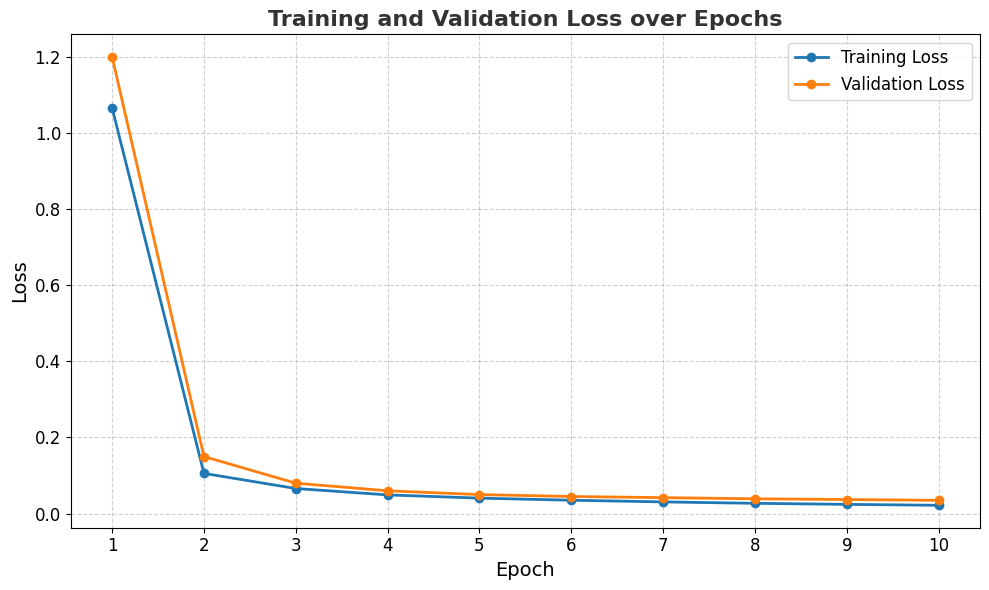

In [208]:
import matplotlib.pyplot as plt

# Epoch and loss data
epochs = list(range(1, 11))
training_loss_values = [1.0657, 0.1057, 0.0660, 0.0492, 0.0407, 0.0352, 0.0308, 0.0271, 0.0243, 0.0219]
validation_loss_values = [1.2, 0.15, 0.08, 0.06, 0.05, 0.045, 0.042, 0.039, 0.037, 0.035]
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss_values, marker='o', linestyle='-', color='#1f77b4', linewidth=2, label='Training Loss')
plt.plot(epochs, validation_loss_values, marker='o', linestyle='-', color='#ff7f0e', linewidth=2, label='Validation Loss')

plt.title('Training and Validation Loss over Epochs', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(epochs, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()

plt.savefig('training_validation_loss_curve.png', dpi=300)
plt.show()


### Model Saving and Inferance:

In [53]:
torch.save(model.state_dict(), "vqa_model_weights.pth")


In [94]:
cmedclip = VQAModel()  # re-initialize the model class
cmedclip.load_state_dict(torch.load("vqa_model_weights.pth"))
# cmedclip.eval()  # set to evaluation mode


C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\3612184682.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cmedclip.load_state_dict(torch.load("vqa_model_weights.pt

<All keys matched successfully>

In [54]:
from PIL import Image
from torchvision import transforms

image_path = r"C:\Users\Rameshwar\MedCoTVQARad\VQARAD\VQA_RADImageFolder"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # adjust for grayscale or RGB if needed
])

def load_image(image_id):
    img = Image.open(f"{image_path}/{image_id}").convert("RGB")
    return transform(img)


## Evaluation Set:

In [60]:
from datasets import load_dataset

evalset = load_dataset("flaviagiammarino/vqa-rad")

In [71]:
def get_image_embedding(image_input):
    from PIL import Image

    # If input is already a PIL Image, use it directly
    if isinstance(image_input, Image.Image):
        image = image_input.convert("RGB")
    # Else if input is a path string, open the image
    elif isinstance(image_input, str):
        image = Image.open(image_input).convert("RGB")
    else:
        raise ValueError("Input must be a file path or PIL Image")

    image_tensor = preprocess(image).unsqueeze(0)
    with torch.no_grad():
        embedding = model.encode_image(image_tensor)
    return embedding.squeeze(0)


In [80]:
from datasets import load_dataset
from PIL import Image
import torch.nn.functional as F
import traceback

# Load dataset
evalset = load_dataset("flaviagiammarino/vqa-rad")
evalem = []
# Initialize storage lists
image_proj_list = []
text_proj_list = []
answer_list = []
for sample in evalset["test"]:
    image = sample["image"]  # PIL image
    question = sample["question"]
    answer = sample["answer"]

    try:
        # Force load the image to avoid lazy-loading issues
        image.load()

        # Ensure you're passing a PIL.Image to the embedding function
        img_emb = get_image_embedding(image)        # ✅ Accepts PIL.Image
        txt_emb = get_text_embedding(question)      # ✅ Accepts string

        img_proj_vec = image_proj(img_emb)
        txt_proj_vec = text_proj(txt_emb)
        image_proj_list.append(img_proj_vec.detach())    # Detach from computation graph
        text_proj_list.append(txt_proj_vec.detach())
        answer_list.append(answer)
      

        evalem.append({
            "question": question,
            "answer": answer
           
        })

        print(f"[✓] Processed: {question}" )

    except Exception as e:
        print(f"[X] Skipping due to error: {e}")
        traceback.print_exc()


[✓] Processed: is there evidence of an aortic aneurysm?
[✓] Processed: is there airspace consolidation on the left side?
[✓] Processed: is there any intraparenchymal abnormalities in the lung fields?
[✓] Processed: which side of the heart border is obscured?
[✓] Processed: where are the kidney?
[✓] Processed: are the kidneys present in this image?
[✓] Processed: is the colon more prominent on the patient's right or left side?
[✓] Processed: where is the colon most prominent from this view?
[✓] Processed: is the heart size in this image smaller or larger than if the image was taken ap?
[✓] Processed: is the liver visible in the image?
[✓] Processed: is this an axial image?
[✓] Processed: what structures are visible in this image?
[✓] Processed: what is this lucency amid densities in the right lung?
[✓] Processed: is there evidence of any abnormalities of the lung parenchyma?
[✓] Processed: are the temporal bones fractured?
[✓] Processed: is there consolidation in the lungs?
[✓] Processe

Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: is the small bowel appropriately identified with gi contrast?
[✓] Processed: is there fluid in the lung?
[✓] Processed: is this a pleural effusion
[✓] Processed: is mass effect present?
[✓] Processed: is there mass effect?
[✓] Processed: how was this image taken
[✓] Processed: is there a mass
[✓] Processed: is a mass present in this xray?
[✓] Processed: describe the pathology
[✓] Processed: what is the pathology?
[✓] Processed: what organ system is the pathology?
[✓] Processed: is there a small bowel obstruction?
[✓] Processed: is there brain edema
[✓] Processed: is the brain swollen?
[✓] Processed: what is the location of the cavitary lesion
[✓] Processed: where is the cavitary lesion located?
[✓] Processed: are there increased vascular markings
[✓] Processed: are the vascular markings increased?
[✓] Processed: what plane is this film
[✓] Processed: what is the location of the mass?
[✓] Processed: where is the mass located?
[✓] Processed: the mass is found in which part

Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: is this an mri?
[✓] Processed: does this patient have a pneumothorax?
[✓] Processed: in what plane was this image taken?
[✓] Processed: is this an mri or a ct scan?
[✓] Processed: can the optic nerve be visualized in this mri image?
[✓] Processed: in which two ventricles can calcifications be seen on this ct scan?
[✓] Processed: what part of the body is being imaged here?
[✓] Processed: are there calcifications present on the abdominal aorta?
[✓] Processed: does this patient have pneumomediastinum?
[✓] Processed: what abnormality is seen on the left side of the frontal lobe?
[✓] Processed: is this a coronal view?
[✓] Processed: are these normal kidney findings?
[✓] Processed: diaphragm is elevated on which side?
[✓] Processed: which side of the diaphragm is elevated?
[✓] Processed: where does the l renal vein connect to
[✓] Processed: where does the l renal vein drain into?
[✓] Processed: does the lesion appear to be wedge-shaped?
[✓] Processed: is the lesion wedge-shape

Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: is this image showing the chest?
[✓] Processed: what organ system is being imaged?
[✓] Processed: the hemorrhage is adjacent to what structures?
[✓] Processed: what structures are located near the hemorrhage shown?
[✓] Processed: is the cardiac silhouette within normal size limits?
[✓] Processed: what major artery of the brain may be affected by the lesion seen in the above image?
[✓] Processed: which major artery of the brain is affected by this lesion?
[✓] Processed: evidence of hemorrhage in the kidneys?
[✓] Processed: is there any hemorrhage seen within the kidneys?
[✓] Processed: is this a t1 weighted mri?
[✓] Processed: where are the brain lesions located?
[✓] Processed: which hemisphere of the brain are the lesions located in?
[✓] Processed: in which brain area is the lesion located?
[✓] Processed: where is the lesion located?
[✓] Processed: the tissue within the hyperattenuating ovoid mass adjacent to the ascending colon is similar in density to what tissue norma

Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: is the heart abnormally large?
[X] Skipping due to error: index out of range in self
[X] Skipping due to error: index out of range in self


Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: what organ system is visualized in the above image?
[✓] Processed: how was this image taken?
[✓] Processed: what imaging modality is used?
[✓] Processed: is the cardiac silhouette small/stretched
[✓] Processed: in which lobe do you see an abnormal mass in the above images?
[✓] Processed: where is the abnormal mass located with respect to the lungs?
[✓] Processed: what imaging modality was used to take this image?
[✓] Processed: where is the abnormality?
[✓] Processed: what abnormality is present?
[✓] Processed: is free air present in this image?
[✓] Processed: is there free air in the abdomen?
[X] Skipping due to error: index out of range in self
[✓] Processed: is the size of the ventricle abnormal?
[✓] Processed: how is the patient positioned for this scan?


Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: is there evidence of pulmonary edema?
[✓] Processed: what is the hypodensity in the liver?
[✓] Processed: is there a hypodense mass in the liver
[✓] Processed: is this patient male or female?
[✓] Processed: what is the patient's gender?
[✓] Processed: is the trachea normal?
[✓] Processed: is the trachea midline?
[✓] Processed: is there a pneumothorax present?
[✓] Processed: is there free air in the thorax?
[✓] Processed: what is located immediately inferior to the right hemidiaphragm?
[✓] Processed: can a mass in the pancreatic head cause a liver injury?
[✓] Processed: is there enlargement of the pulmonary vasculature?
[✓] Processed: does the liver show an enhancing mass or lesion?
[✓] Processed: is there an enhancing lesion in the liver?
[✓] Processed: what are the black areas at the top of the image?
[✓] Processed: what does the least dense region represent
[✓] Processed: what is the orientation of the patient?
[✓] Processed: is this a coronal section?
[X] Skipping due

Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: can a patient with a metal implant get a cxr?
[✓] Processed: is the lesion on the left or right?
[✓] Processed: is the cardiac contour normal?
[✓] Processed: what side is the lesion on?
[✓] Processed: what are the hyperdensities on the periphery of the image?
[✓] Processed: what are the hyperdense opacities located around the periphery?
[✓] Processed: are there skull fractures present?
[✓] Processed: is the skull fractured?
[✓] Processed: is there sign of a skull fracture?
[✓] Processed: is the skull fractured?
[✓] Processed: what is better identified on a pa cxr vs a lateral cxr?
[✓] Processed: does this image show a pneumothorax?
[✓] Processed: is there a pneumothorax present?
[✓] Processed: is the cardiac silhouette less than half the lateral diameter of the chest wall?
[✓] Processed: are the hemidiaphragms flattened?
[✓] Processed: is the diaphragm flat on either side?
[✓] Processed: is there any abnormality in this image?
[✓] Processed: are there lesions in this ima

Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: is there a focal mass present?
[✓] Processed: is there air trapped in the body?
[✓] Processed: is there free air present?
[✓] Processed: are there pulmonary findings?
[✓] Processed: is there any abnormality in the lungs?
[✓] Processed: are there abnormal findings?
[✓] Processed: is anything not normal in the image?
[✓] Processed: what is the condition?
[✓] Processed: what is the pathology?
[✓] Processed: how is the patient oriented?
[✓] Processed: is the outline of visceral pleura visible in the upper left lung field?
[✓] Processed: in what plane was this image taken?
[X] Skipping due to error: index out of range in self
[✓] Processed: is cardiomegaly present?


Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: what are the bright specks in the gallbladder
[✓] Processed: are gallstones identifiable?
[✓] Processed: is air present in the bowels?
[✓] Processed: is there bowel gas?
[✓] Processed: what two tributaries of blood vessels are impacted?
[✓] Processed: which blood vessels are affected?
[✓] Processed: what organ is affected by pathology in this image?
[✓] Processed: is there slight dilation of the right renal pelvis?
[✓] Processed: what structures are involved?
[✓] Processed: is there evidence of a pneumoperitoneum?
[✓] Processed: is there free air underneath the diaphragm?
[✓] Processed: what organ system is shown?
[✓] Processed: what structure is depicted?
[✓] Processed: what pathology does the image represent
[✓] Processed: what is the mass most likely?
[✓] Processed: are the borders of the mass well-defined?
[✓] Processed: are the borders of the mass well-defined and is the interior of the mass homogenous?
[✓] Processed: is the interior of the mass homogenous?
[✓] Proc

Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: is the lesion hyperdense?
[✓] Processed: is the air under the diaphragm pathologic?
[✓] Processed: is there a mediastinal shift?
[✓] Processed: is there free air under the diaphragm?
[✓] Processed: what modality is used to take this image?
[✓] Processed: is the aorta size abnormal?
[✓] Processed: is the aorta dilated?
[✓] Processed: which lung lobe has the least opacities?
[✓] Processed: term for the enhancement of the luminal surface seen in the image?
[✓] Processed: is there contrast in the patient's small bowel?
[✓] Processed: the hyperattenuating ovoid mass is lateral to what structure?
[✓] Processed: what do the two small hyperintensities indicate?
[✓] Processed: is the abdominal aorta within normal size limits?
[✓] Processed: is the left lung field more radioopaque than the right side?
[✓] Processed: can the patient's encephalon be seen in this image?
[✓] Processed: are the clavicles fractured?
[✓] Processed: which kidney has fluid around it?
[✓] Processed: is pneu

Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: is the left lung field more white?
[✓] Processed: is there a chest tube placed?
[✓] Processed: is there evidence of pneumoperitoneum?
[✓] Processed: is this a contrast-enhanced ct?
[✓] Processed: are nodules present in both lungs?
[✓] Processed: where is the location of the mass?
[✓] Processed: are the structures in the pancreas cystic or solid?
[✓] Processed: is there an air-fluid level?
[✓] Processed: is there free air in the abdomen?
[✓] Processed: how large is the mass?
[✓] Processed: are there ekg leads on this patient?
[✓] Processed: is the liver normal?
[✓] Processed: is this a normal image?
[✓] Processed: are the nodules well circumscribed?
[✓] Processed: is this a normal image?
[X] Skipping due to error: index out of range in self
[✓] Processed: what image plane is this?


Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: what modality was used?
[✓] Processed: is there air present under the diaphragm?
[✓] Processed: is this image normal or abnormal?
[✓] Processed: what modality was used for this image?
[✓] Processed: where are the signals most intense?
[✓] Processed: is this a typical liver?
[✓] Processed: where are the infarcts?
[✓] Processed: is there a shift of midline structures?
[✓] Processed: is there fat stranding?
[✓] Processed: the hypointense nature of the hemorrhage signifies what in terms of the timeline?
[✓] Processed: is the spleen present?
[✓] Processed: is the left kidney abnormal?
[✓] Processed: is there any adenopathy?
[X] Skipping due to error: index out of range in self
[X] Skipping due to error: index out of range in self
[✓] Processed: what type of mri modality is used?


Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: describe the lung abnormalities?
[✓] Processed: is this a normal image?
[✓] Processed: is there cortical atrophy?
[✓] Processed: are the hepatic lesions ring enhancing?
[✓] Processed: what image modality is used?
[✓] Processed: are the costophrenic angles preserved?
[✓] Processed: is the right diaphragm visualized?
[X] Skipping due to error: index out of range in self
[✓] Processed: is there hilar lymphadenopathy?


Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: is the gastric bubble shown on the left or right side of the patient?
[✓] Processed: where is the opacity located?
[✓] Processed: is there vascular pathology in this image?
[✓] Processed: what abnormalities are seen within the lungs?
[✓] Processed: is there evidence of rib fracture?
[✓] Processed: how big is the mass in cm?
[✓] Processed: are pleural opacities located on the left, right, or both sides of the lung?
[X] Skipping due to error: index out of range in self
[X] Skipping due to error: index out of range in self


Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: is the appendix normal in size?
[✓] Processed: is this patient in a supine position?
[✓] Processed: is the patient lying supine?
[✓] Processed: what is the location of the three circular opacities?
[✓] Processed: where are the three circular opacities located?
[✓] Processed: what is under the right hemidiaphragm?
[✓] Processed: is this an axial view of the brain?
[✓] Processed: does the liver contain at least one hypodensity?
[✓] Processed: is there a hypodensity located in the liver?
[✓] Processed: was this image taken by x-ray?
[✓] Processed: how is the artifact in this image categorized?
[✓] Processed: what type of artifact is shown in this image?
[✓] Processed: is this an axial or saggital view of the brain?
[✓] Processed: what cross section of the brain is this image?
[✓] Processed: did this patient receive iv contrast?
[✓] Processed: was this patient given iv contrast?
[✓] Processed: what is the abnormality by the right hemidiaphragm?
[✓] Processed: is this a t1 we

Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: is there hypoinflation or hyperinflation of the lung
[✓] Processed: does the left hemidiaphragm appear flat?
[✓] Processed: is there flattening of the left hemidiaphragm?
[✓] Processed: are the small bubbles of air seen normal or abnormal?
[✓] Processed: the small bubbles of air seen in the lumen are normal or abnormal?
[✓] Processed: is this in the posterior anterior plane?
[✓] Processed: what is the sequence of this mri?
[✓] Processed: what pathology is seen in this image?
[✓] Processed: what is wrong with the patient's scan?
[✓] Processed: are the sulci abnormal?
[✓] Processed: do the sulci look abnormal in this image?
[✓] Processed: the image probably had what incidental finding?
[✓] Processed: what was probably found incidentally on this image?
[✓] Processed: is this a ct or an mri?
[✓] Processed: was a ct or mri used to take the above image?
[✓] Processed: this image is taken in what plane?
[✓] Processed: how would you describe the spleen abnormality
[✓] Processed:

Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[✓] Processed: is there free air in the supraclavicular fossae?
[✓] Processed: where is the ascending colon?
[✓] Processed: what structure lies directly posterior to the appendix in this image?
[✓] Processed: are the borders of the heart clearly visualized?
[X] Skipping due to error: index out of range in self


Traceback (most recent call last):
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\1457873664.py", line 24, in <module>
    txt_emb = get_text_embedding(question)      # ✅ Accepts string
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\909675682.py", line 10, in get_text_embedding
    outputs = text_model(**inputs)
              ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\torch\nn\modules\module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rameshwar\MedCoTVQARad\clipinf\Lib\site-packages\transformers\models\bert\modeling_bert.py", line 1007, in forward
    embedding_output = self.em

[X] Skipping due to error: index out of range in self
[✓] Processed: is this image taken above the diaphragm?
[✓] Processed: what is in the left apex?
[✓] Processed: is a pneumothorax present in the left apex?
[✓] Processed: where is the lesion located?


In [220]:
evalem

[{'question': 'is there evidence of an aortic aneurysm?', 'answer': 'yes'},
 {'question': 'is there airspace consolidation on the left side?',
  'answer': 'yes'},
 {'question': 'is there any intraparenchymal abnormalities in the lung fields?',
  'answer': 'no'},
 {'question': 'which side of the heart border is obscured?',
  'answer': 'right'},
 {'question': 'where are the kidney?', 'answer': 'not seen here'},
 {'question': 'are the kidneys present in this image?', 'answer': 'no'},
 {'question': "is the colon more prominent on the patient's right or left side?",
  'answer': 'left'},
 {'question': 'where is the colon most prominent from this view?',
  'answer': 'left'},
 {'question': 'is the heart size in this image smaller or larger than if the image was taken ap?',
  'answer': 'smaller'},
 {'question': 'is the liver visible in the image?', 'answer': 'no'},
 {'question': 'is this an axial image?', 'answer': 'yes'},
 {'question': 'what structures are visible in this image?',
  'answer': 

In [82]:
torch.save({
    "image_proj": torch.stack(image_proj_list),
    "text_proj": torch.stack(text_proj_list),
    "answers": answer_list  # still raw text, optionally map to class index later
}, "vqa_projected_embeddings.pt")


In [84]:
import torch

# Load the saved file
results = torch.load("vqa_projected_embeddings.pt")

# Extract the tensors and answers
image_proj = results["image_proj"]         # shape: [N, D]
text_proj = results["text_proj"]           # shape: [N, D]
answers = results["answers"]               # list of strings

print(image_proj.shape, text_proj.shape, len(answers))


torch.Size([428, 512]) torch.Size([428, 512]) 428


C:\Users\Rameshwar\AppData\Local\Temp\ipykernel_9824\3947027362.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  results = torch.load("vqa_projected_embeddings.pt")


In [86]:
results=list(results.values())

In [87]:
samples = []
N = results[0].shape[0]  # Number of samples

for i in range(N):
    sample = {
        "img_proj": results[0][i],   # tensor shape: [512]
        "txt_proj": results[1][i],   # tensor shape: [512]
        "answer": results[2][i]      # depends on answer encoding
    }
    samples.append(sample)


In [131]:
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-small")

dataset = VQADataset(samples, tokenizer)
dataloader = DataLoader(dataset, batch_size=8, shuffle=False)

In [111]:
dataloader

In [99]:
from transformers.modeling_outputs import BaseModelOutput

In [132]:
def evaluate_model(model, dataloader, tokenizer, device):
    model.eval()
    model.to(device)
    predictions = []
    questions = []
    gts = []

    with torch.no_grad():
        for batch in dataloader:
            fused_input = batch["fused_input"].to(device)  # [B, 2, 512]

            # Get encoder output
            fused_vector = model.encoder(fused_input)               # [B, 512]
            t5_input = model.proj_to_t5(fused_vector).unsqueeze(1)  # [B, 1, 768]

            dummy_input_ids = torch.full(
                (fused_input.size(0), 1),
                model.t5.config.pad_token_id,
                dtype=torch.long
            ).to(device)

            # Generate answers
            outputs = model.t5.generate(
                   input_ids=dummy_input_ids,
                    encoder_outputs=BaseModelOutput(last_hidden_state=t5_input),
                    max_length=32,
                    num_beams=4
            )

            decoded_preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
            predictions.extend(decoded_preds)

            if "answer" in batch:
                gts.extend(batch["answer"])
            if "question" in batch:
                questions.extend(batch["question"])

    return predictions, questions, gts


In [ ]:
cmedclip = VQAModel()  # or loaded from a checkpoint
cmedclip.load_state_dict(torch.load("path_to_model.pt"))


In [133]:
device = "cuda" if torch.cuda.is_available() else "cpu"
predictions, questions, ground_truths = evaluate_model(cmedclip, dataloader, tokenizer, device)


In [136]:
ground_truths = [sample["answer"] for sample in samples]
# questions = [sample["question"] for sample in samples]


In [ ]:
predictions = predictions  # from model.t5.generate(...)
ground_truths = [sample["answer"] for sample in samples]
questions = [sample["question"] for sample in samples]

# Example:
for q, gt, pred in zip(questions, ground_truths, predictions):
    print(f"Q: {q}\nGT: {gt}\nPredicted: {pred}\n")


In [221]:
ground_truths

['yes',
 'yes',
 'no',
 'right',
 'not seen here',
 'no',
 'left',
 'left',
 'smaller',
 'no',
 'yes',
 'skull \tcartilage and medulla',
 'the right bronchus',
 'no',
 'no',
 'no',
 'plain film x-ray',
 'the small intestines',
 'no',
 'no',
 'the diaphragm',
 'no',
 'axial',
 'no',
 'yes',
 'ct with contrast',
 'no',
 'no',
 'lateral ventricles',
 'lateral ventricles',
 'no',
 'no',
 'supratentorial',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'fat',
 'fat',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'mid left subclavian vein',
 'mid left subclavian vein',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 't2-mri',
 'yes',
 'yes',
 'cardiomegaly with pulmonary edema',
 'cardiomegaly with pulmonary edema',
 'pulmonary/lymphatic',
 'yes',
 'yes',
 'yes',
 'right upper lobe',
 'right upper lobe',
 'yes',
 'yes',
 'coronal',
 'head of the pancreas',
 'head of the pancreas',
 'the pancreatic head',
 'yes',
 't2 weighted mri',
 'right frontal

In [117]:
print("Total predictions:", len(predictions))
print("Total ground truths:", len(ground_truths))

for i in range(5):
    print(f"Prediction: {predictions[i]}")
    # print(f"Ground Truth: {ground_truths[i]}")


Total predictions: 428
Total ground truths: 0
Prediction: stelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstelltstellt
Prediction: oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress oppress
Prediction: pazpazpazpazpazpazpazpazpazpazpazpazpazpazpazpazpazpazpazpazpazpazpazpazpazpazpazpazpazpazpaz
Prediction: stütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstütztstützt
Prediction: istikistikistikistikistikistikistikistikistikistikistikistikistikistikistikistikistikistikistikistikistikistikistikistikistikistikistikistikistikistikistik


In [1]:
# bleu_score = bleu.compute(predictions=predictions, references=[[gt] for gt in ground_truths])
# rouge_score = rouge.compute(predictions=predictions, references=ground_truths)

# print("BLEU Score:", bleu_score)
# print("ROUGE Score:", rouge_score)


In [4]:
# def map_to_yes_no(output):
#     output = output.lower()
#         return 'yes'
#     elif 'no' in output:
#         return 'no'
#     else:
#         return random.choice(['yes', 'no'])  
# accuracy = num_correct / total

### Saliency Map:

In [141]:
# Assume you have already:
# - A list 'samples' with your dataset dicts
# - A tokenizer loaded from transformers, e.g., T5Tokenizer.from_pretrained("google/flan-t5-small")

from torch.utils.data import DataLoader

tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-small")
dataset = VQADataset(samples, tokenizer)

# Get one sample from dataset
sample = dataset[0]

# fused_input shape: [2, 512] (no batch dimension yet)
your_fused_input = sample["fused_input"].unsqueeze(0)  # Add batch dim: [1, 2, 512]

print("Fused input shape:", your_fused_input.shape)


Fused input shape: torch.Size([1, 2, 512])


In [160]:
print(sample_fused_input.shape)  # should print: torch.Size([1, 2, 512])


torch.Size([1, 1, 2, 512])


In [161]:
sample_fused_input = sample_fused_input.squeeze(1)  # remove extra dim if present
 # shape becomes [2, 512]


In [162]:
sample_fused_input = sample_fused_input.squeeze(0) 

In [193]:
def compute_saliency(model, fused_input, target_token_idx=0):
    fused_input = fused_input.detach().clone().requires_grad_(True)
    fused_input.retain_grad()

    batch_size = fused_input.size(0)
    dummy_labels = torch.full(
        (batch_size, 1),
        model.t5.config.pad_token_id,
        dtype=torch.long,
        device=fused_input.device
    )

    with torch.enable_grad():
        loss, logits = model(fused_input, labels=dummy_labels)
        pred_token_logits = logits[0, target_token_idx]
        max_logit = pred_token_logits.max()
        max_logit.backward()

    grad = fused_input.grad
    if grad is None:
        raise RuntimeError("Gradient not computed. Check backward() call.")

    # Since grad shape is [1, 2, 512], index accordingly:
    img_saliency = grad[0, 0, :].abs().detach().cpu()
    txt_saliency = grad[0, 1, :].abs().detach().cpu()

    return img_saliency, txt_saliency


In [199]:
if your_fused_input.dim() == 2:  # [2, 512]
    sample_fused_input = your_fused_input.unsqueeze(0)
elif your_fused_input.dim() == 3:  # [1, 2, 512]
    sample_fused_input = your_fused_input
else:
    raise ValueError(f"Invalid shape {your_fused_input.shape} — expected [2, 512] or [1, 2, 512]")

# (optional) move to model's device
device = next(cmedclip.parameters()).device
sample_fused_input = sample_fused_input.to(device)

img_sal, txt_sal = compute_saliency(cmedclip, sample_fused_input)

  # add batch dim

# Plot image saliency vector as bar graph


In [190]:
img_sal

tensor(6314.3389)

In [179]:
print(np.arange(len(img_sal)))


[0 1]


In [182]:
print(f"Image features shape: {sample_fused_input[:, :512].shape}")


Image features shape: torch.Size([1, 2, 512])


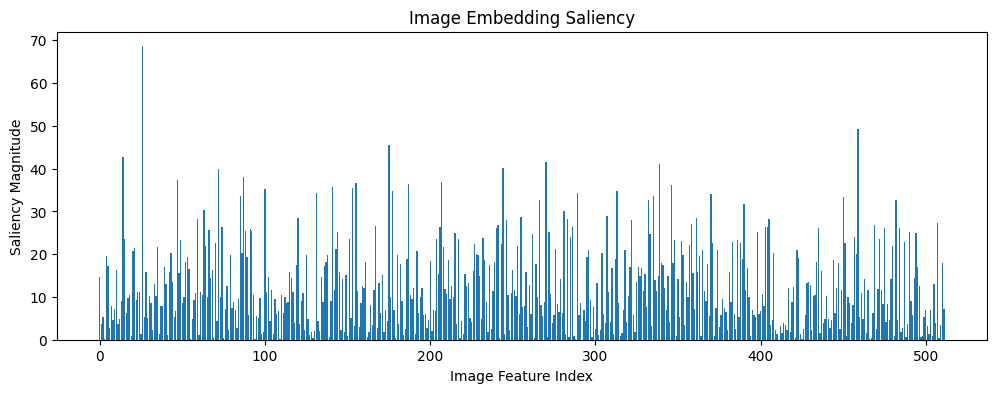

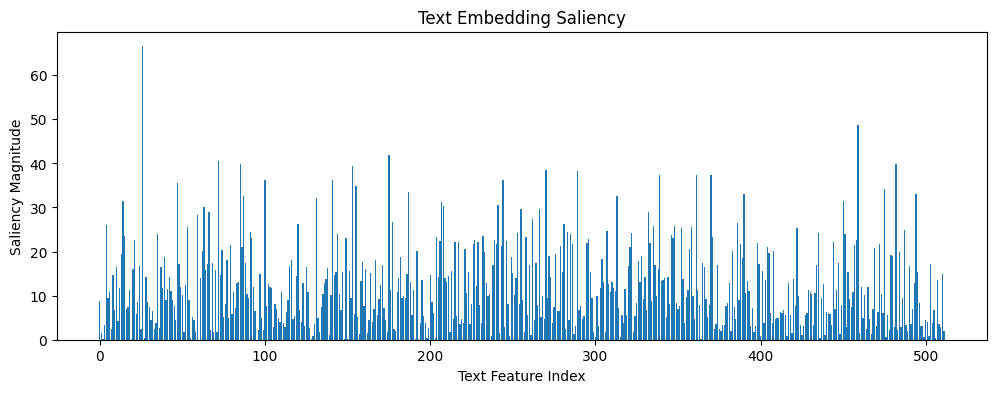

In [198]:
plt.figure(figsize=(12,4))
plt.bar(np.arange(len(img_sal)), img_sal.abs())
plt.title("Image Embedding Saliency")
plt.xlabel("Image Feature Index")
plt.ylabel("Saliency Magnitude")
plt.show()


plt.figure(figsize=(12,4))
plt.bar(np.arange(len(txt_sal)), txt_sal.abs())
plt.title("Text Embedding Saliency")
plt.xlabel("Text Feature Index")
plt.ylabel("Saliency Magnitude")
plt.show()

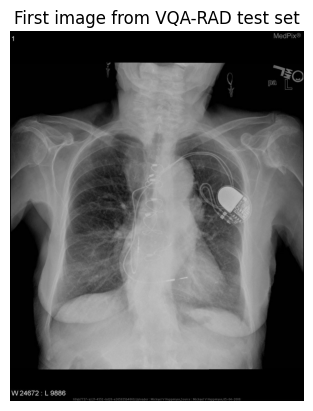

In [202]:
import matplotlib.pyplot as plt

# Access the first sample from the test split
first_sample = evalset["test"][0]

# The image is already a PIL Image object
image = first_sample["image"]

# Show the image
plt.imshow(image)
plt.axis('off')
plt.title("First image from VQA-RAD test set")
plt.show()


In [205]:
np.asarray(image).shape

(1291, 1024, 3)

In [216]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder_vit.to(device)
encoder_vit = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
encoder_vit.from_pretrained("ucl-med/medclip-vit-base-patch16")

# Make sure the model is in eval mode
encoder_vit.eval()
image_tensor = transform(image).unsqueeze(0).to(device)
image_tensor.requires_grad_()

Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_

load model weight from: ucl-med/medclip-vit-base-patch16


tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -0.8902, -0.9922, -1.0000],
          [-0.9922, -0.9922, -0.9529,  ..., -0.7569, -0.9922, -1.0000],
          ...,
          [-1.0000, -0.9922, -0.9765,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9922, -0.9922, -0.9922,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9922, -0.9922, -0.9922,  ..., -0.9922, -0.9922, -0.9922]],

         [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -0.8902, -0.9922, -1.0000],
          [-0.9922, -0.9922, -0.9529,  ..., -0.7569, -0.9922, -1.0000],
          ...,
          [-1.0000, -0.9922, -0.9765,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9922, -0.9922, -0.9922,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9922, -0.9922, -0.9922,  ..., -0.9922, -0.9922, -0.9922]],

         [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -

## Image saliency:

In [217]:
# output = encoder_vit.encode_image(image_tensor)

# # 5) Continue with saliency
# score = output[0].max()   # or whatever target you pick
# score.backward()
# # 
# saliency = image_tensor.grad.abs().squeeze().sum(dim=0).cpu().numpy()

# # 6) Plot
# import matplotlib.pyplot as plt
# plt.imshow(saliency, cmap="hot")
# plt.axis("off")
# plt.show()

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

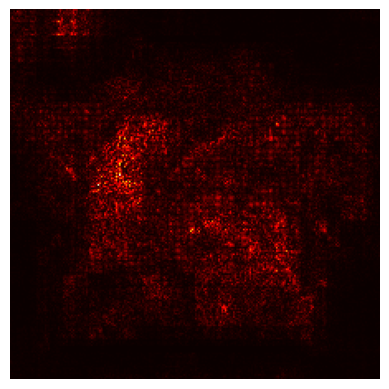

In [218]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Move the MedCLIP model (including its vision and text backbones)
encoder_vit.to(device)

# 2. Also explicitly move the internal vision_model if needed
#    (sometimes custom wrappers don't auto-move child modules)
encoder_vit.vision_model.to(device)

# 3. If there’s a projection head, move it too
if hasattr(encoder_vit, "projection") or hasattr(encoder_vit, "proj"):
    for attr in ["projection", "proj", "image_proj", "text_proj"]:
        if hasattr(encoder_vit, attr):
            getattr(encoder_vit, attr).to(device)

# 4. Prepare your image
image_tensor = transform(image).unsqueeze(0).to(device)
image_tensor.requires_grad_()

# 5. Forward & backward
output = encoder_vit.encode_image(image_tensor)  # now both model & input are on GPU
score = output[0].max()
score.backward()

# 6. Build saliency
saliency = image_tensor.grad.abs().squeeze().sum(dim=0).cpu().numpy()

# 7. Plot
import matplotlib.pyplot as plt
plt.imshow(saliency, cmap="hot")
plt.axis("off")
plt.show()
